In [2]:
import turtle
import numpy as np
import os
import time
import math
import sys
from math import pi
import subprocess
from PIL import Image, ImageDraw
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import random

In [3]:
sys.path.append('..')
from py_models.geo_math import *
from py_models.draw_tools import *
from py_models.euclidean_spanner import EuclideanSpanner
from py_models.pointset import Pointset

In [4]:
PI = np.pi
PAPER_T = (3+4*PI)/3

In [5]:
def draw_pathgreedy_from_pointset(pointset, t=PAPER_T, random_tiebreak=False, img_w=300, img_h=300):
    pointset.print_all_to_file('temp_file.in')
    cmd = './printout_general_path_greedy_test ' + str(t)
    if random_tiebreak:
        cmd += ' -random'
    cmd += ' < temp_file.in > temp_file.out'
    output = subprocess.check_output(cmd, shell=True)

    print('Pointset is' + (' ' if are_convex(pointset.points) else ' NOT ') + 'convex')
    print(output)
    ret = draw_line_segments(get_segments_from_file('temp_file.out'), img_w, img_h, pointset=pointset)
    subprocess.check_call(['rm', 'temp_file.in'])
    subprocess.check_call(['rm', 'temp_file.out'])
    return ret

In [146]:
def draw_random_nonplane(t=PAPER_T, N=4, iter_count=1000, random_tiebreak=False, img_w=300, img_h=300):
    cmd = './random_grid_nonplane ' + str(t) + ' ' + str(N) + ' ' + str(iter_count) 
    cmd += ' > temp_file.out'
    output = subprocess.check_output(cmd, shell=True)

    ret = draw_line_segments(get_segments_from_file('temp_file.out'), img_w, img_h)
    subprocess.check_call(['rm', 'temp_file.out'])
    return ret

In [6]:
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt

# for consistency with my other drawing, the y-axis here will be inverted
def plot_delaunay_from_pointset(pointset):
    points = np.array([refX(p) for p in pointset.points])
    tri = Delaunay(points)
    plt.triplot(points[:,0], points[:,1], tri.simplices)
    plt.plot(points[:,0], points[:,1], 'o')
    plt.show()

## Actual work

In [6]:
ps = Pointset(file_path='../pointsets/hand/example_not_plane.txt')

Pointset is convex
b''
N = 14
Planarity: NOT PLANAR
Max degree: 2
Stretch: 5.05151



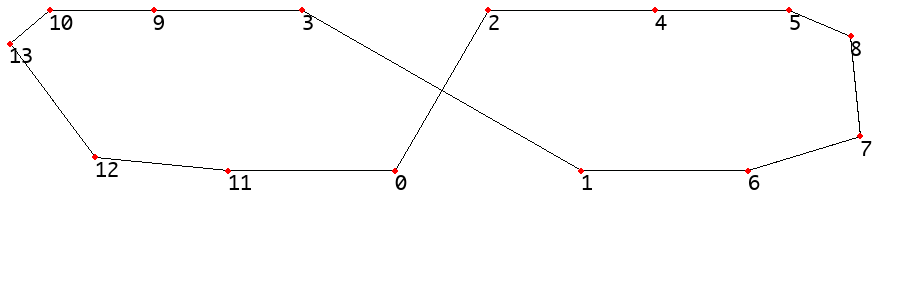

In [7]:
# Path-greedy
draw_pathgreedy_from_pointset(ps, img_w = 900)

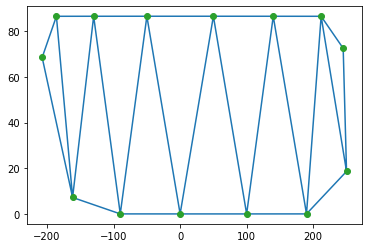

In [8]:
# Delaunay
plot_delaunay_from_pointset(ps)

###################################################################################################################
### Attempt: add the larges edge in the CH to try to break planarity. 
### Result: FAILED with counterexample

In [9]:
ps = Pointset(file_path='../pointsets/hand/example_not_plane.txt')
p = ps.points
p[8] = scale_vector(p[5], point_rotation(PI+0.2, p[4], p[5]), .5)
p[7] = scale_vector(p[6], point_rotation(PI-0.2, p[1], p[6]), .7)
newp = (p[8] + p[7]) / 2
newp = shift(newp, x=point_distance(p[1], p[2])*.6)
newp = scale_vector(p[8], point_rotation(PI+0.0001, p[5], p[8]),
                    100.01/point_distance(p[8], p[5]))
#p[7] = shift((p[6] + newp)/2, y=.001)

In [10]:
ps = Pointset(points=[*p, newp])
ps.add_before_edge([7, 14])

Pointset is convex
b''
N = 15
Planarity: NOT PLANAR
Max degree: 3
Stretch: 5.18034



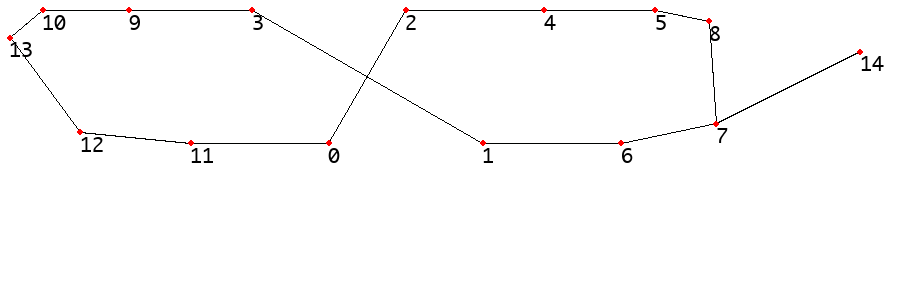

In [11]:
draw_pathgreedy_from_pointset(ps, img_w = 900)

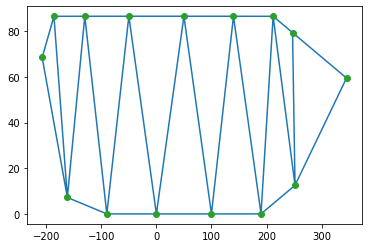

In [12]:
plot_delaunay_from_pointset(ps)

In [13]:
point_distance(ps.points[8], ps.points[14]) > point_distance(ps.points[1], ps.points[0])

True

In [14]:
point_distance(ps.points[7], ps.points[14])

104.68461208800922

In [15]:
###########################################################################################

Pointset is NOT convex
b''
N = 400
Planarity: PLANAR
Max degree: 4
Stretch: 3



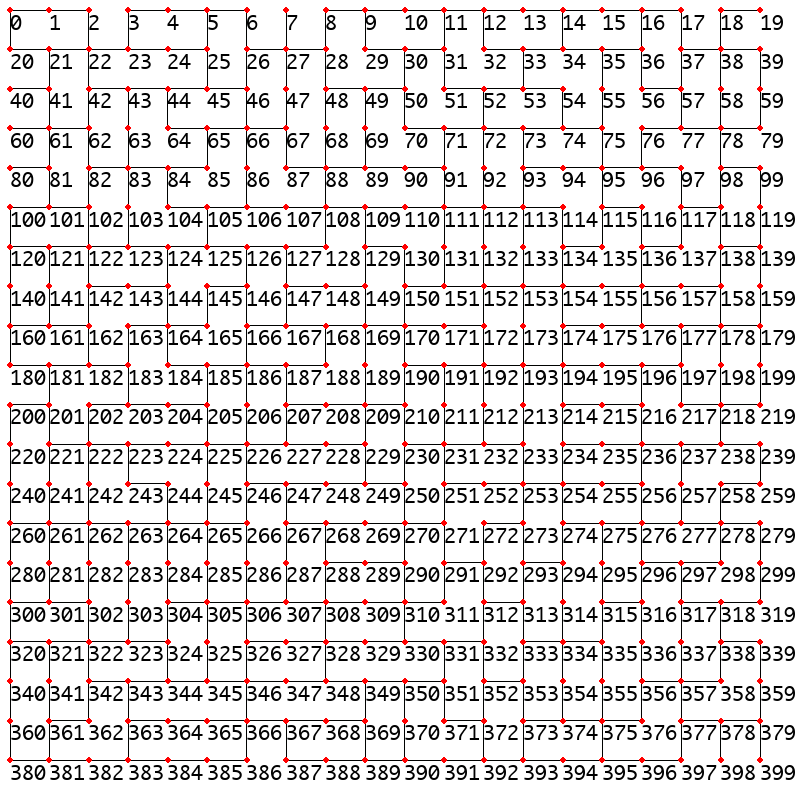

In [16]:
N = 20
points = [[j, i] for i in range(0, N) for j in range(0, N)]
ps = Pointset(points=points)
sz = 800
draw_pathgreedy_from_pointset(ps, t=3, random_tiebreak=True, img_w=sz, img_h=sz)

Pointset is NOT convex
b''
N = 400
Planarity: NOT PLANAR
Max degree: 4
Stretch: 5



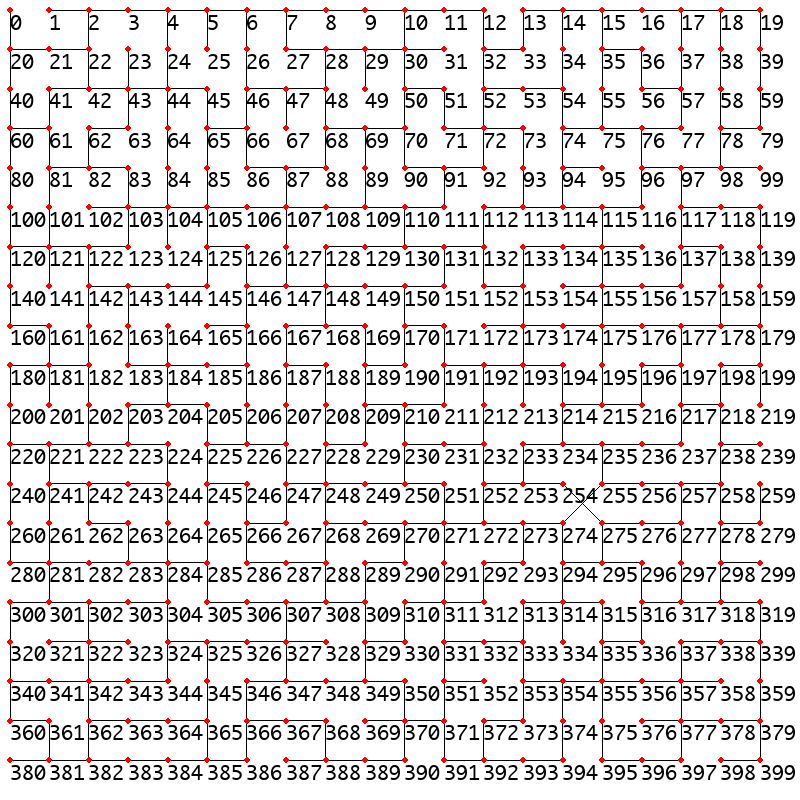

In [17]:
N = 20
points = [[j, i] for i in range(0, N) for j in range(0, N)]
ps = Pointset(points=points)
sz = 800
draw_pathgreedy_from_pointset(ps, t=5, random_tiebreak=True, img_w=sz, img_h=sz)

Pointset is NOT convex
b''
N = 400
Planarity: PLANAR
Max degree: 4
Stretch: 3



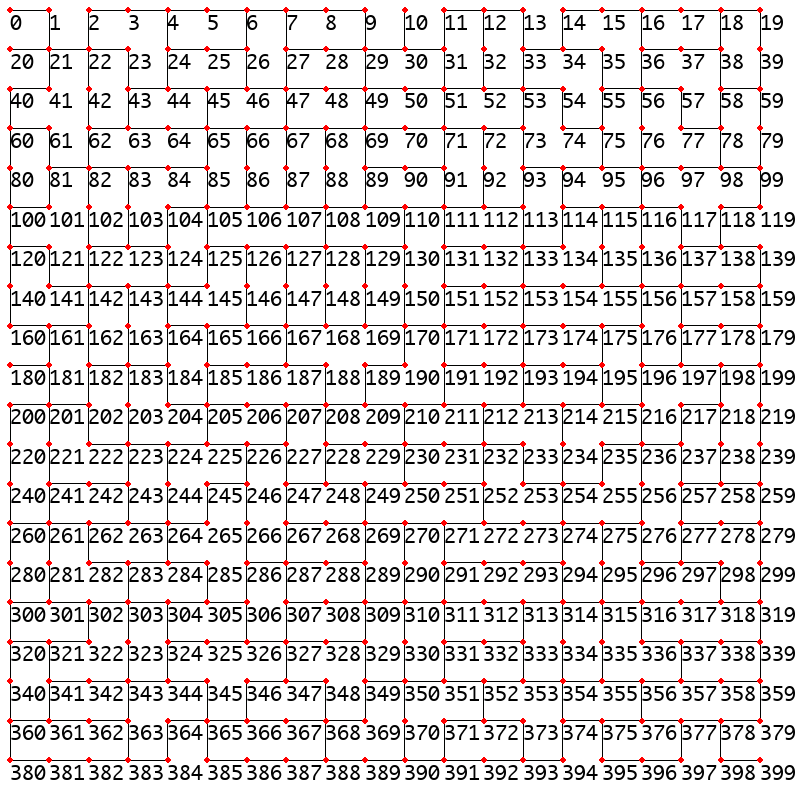

In [18]:
N = 20
points = [[j, i] for i in range(0, N) for j in range(0, N)]
ps = Pointset(points=points)
sz = 800
draw_pathgreedy_from_pointset(ps, t=3, random_tiebreak=True, img_w=sz, img_h=sz)

Pointset is NOT convex
b''
N = 169
Planarity: NOT PLANAR
Max degree: 4
Stretch: 3



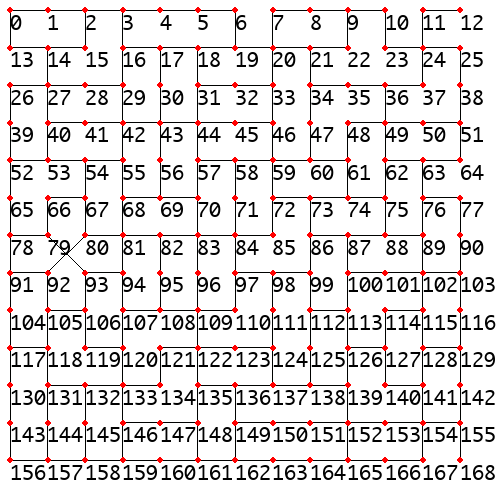

In [140]:
N = 13
points = [[j, i] for i in range(0, N) for j in range(0, N)]
ps = Pointset(points=points)
sz = 500
draw_pathgreedy_from_pointset(ps, t=4, random_tiebreak=True, img_w=sz, img_h=sz)

N = 64
Planarity: NOT PLANAR
Iterations taken: 3
Stretch: 3



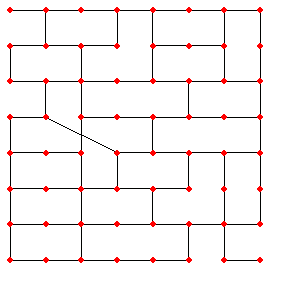

In [168]:
draw_random_nonplane(t=3, N=8, iter_count=10000)